<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4: Web Scraping Job Postings


## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

In [1434]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word

from collections import Counter
import string
import re


%matplotlib inline

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline






<font color="DarkRed">  
# !! REMEMBER to review comments with these to clean up
#!!KIV
#!!Testing

<font color="DarkSlateBlue">
## Sections<br>
- [Data Preprocessing](#preprocess_data)
    - [Data Cleaning and Wrangling](#clean_data)
    - [Split into training and test sets](#split_train_test)
    - [Exploratory Data Analysis and Feature Engineering](#eda_fe)

Not completed
- [Qn 1 - Train and test] (#qn1)

Not done
- [Section 1 Salary Trends](#section_1)
- [Section 2 Job Category Factors](#section_2)
- [Executive Summary](#executive_summary)
- [Bonus - Tradeoffs between detecting high vs low salary positions](#bonus_tradeoff)

<a id='preprocess_data'/>
## Data Preprocessing

<a id='clean_data'/>
### Data Cleaning and Wrangling

In [1374]:
# read in the dataset
df = pd.read_csv('jobs2018311700.csv')

#### Quick Look at null cells

In [1375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 13 columns):
Unnamed: 0               1604 non-null float64
job_title                1612 non-null object
job_company              1612 non-null object
job_location             1551 non-null object
job_seniority            1585 non-null object
job_category             1612 non-null object
job_employment_type      1612 non-null object
job_salary_range_from    1485 non-null object
job_salary_range_to      1485 non-null object
job_salary_type          1485 non-null object
job_details_url          1612 non-null object
job_description          1611 non-null object
job_requirements         1551 non-null object
dtypes: float64(1), object(12)
memory usage: 163.8+ KB


In [1376]:
df.rename(columns={'job_category':'job_industry'},inplace=True)

In [1377]:
# drop where salary is null
df = df.dropna(subset=['job_salary_type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 0 to 1611
Data columns (total 13 columns):
Unnamed: 0               1477 non-null float64
job_title                1485 non-null object
job_company              1485 non-null object
job_location             1466 non-null object
job_seniority            1480 non-null object
job_industry             1485 non-null object
job_employment_type      1485 non-null object
job_salary_range_from    1485 non-null object
job_salary_range_to      1485 non-null object
job_salary_type          1485 non-null object
job_details_url          1485 non-null object
job_description          1484 non-null object
job_requirements         1466 non-null object
dtypes: float64(1), object(12)
memory usage: 162.4+ KB


In [1378]:
# drop duplicates
df.drop_duplicates(subset=['job_title','job_company','job_location','job_industry'], keep='first', inplace=True)
df.drop(columns='Unnamed: 0',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 1611
Data columns (total 12 columns):
job_title                965 non-null object
job_company              965 non-null object
job_location             954 non-null object
job_seniority            961 non-null object
job_industry             965 non-null object
job_employment_type      965 non-null object
job_salary_range_from    965 non-null object
job_salary_range_to      965 non-null object
job_salary_type          965 non-null object
job_details_url          965 non-null object
job_description          964 non-null object
job_requirements         954 non-null object
dtypes: object(12)
memory usage: 98.0+ KB


In [1379]:
# drop rows which were headers - when I joined multiple csv files
df.drop(index=(df[df['job_location']=='job_location'].index),inplace=True)
df.shape

(964, 12)

In [1380]:
# Take a quick look at rows where any values are null
df[df.isnull().any(axis=1)]
# Let's handle nulls as part of cleaning up each feature

,job_title,job_company,job_location,job_seniority,job_industry,job_employment_type,job_salary_range_from,job_salary_range_to,job_salary_type,job_details_url,job_description,job_requirements
54,Lecturer - IT Applications Development,Institute of Technical Education,NaN,Executive,Education and Training ...,Contract,"$3,000","$6,000",Monthly,https://www.mycareersfuture.sg/job/lecturer-ap...,<p><strong>Responsibilities</strong><br> <br>A...,NaN
67,"Assistant Manager, GeoAnalytics",Singapore Land Authority,NaN,Middle Management,Information Technology ...,Full Time,"$3,500","$6,800",Monthly,https://www.mycareersfuture.sg/job/assistant-m...,"<p><strong>Assistant Manager, GeoAnalytics</st...",NaN
68,"Assistant Manager / Technical Manager, GeoSpa...",Singapore Land Authority,NaN,Middle Management,Information Technology ...,Full Time,"$4,000","$6,800",Monthly,https://www.mycareersfuture.sg/job/assistant-m...,<p><strong>Assistant Manager/ Technical Manage...,NaN
204,Strategic Account Executive,TALEND SINGAPORE PTE. LTD.,NaN,Executive,Sales / Retail,Permanent,"$140,000","$250,000",Annually,https://www.mycareersfuture.sg/job/strategic-a...,<p><strong>Strategic Account Executive (Malays...,<p>Talend is hiring a results driven Account E...
842,Data Analyst - Data Transformation IMO,ROBERT WALTERS (SINGAPORE) PTE LTD,Central,Executive,Information Technology,Temporary ...,"$6,000","$7,400",Monthly,https://www.mycareersfuture.sg/job/data-analys...,NaN,NaN
930,"Senior Executive, Data Services",Singapore Land Authority,NaN,Fresh/entry level,Information Technology ...,Contract,"$2,800","$5,600",Monthly,https://www.mycareersfuture.sg/job/senior-exec...,"<p><strong>Senior Executive, Data Services</st...",NaN
959,"Senior Executive, Data Management",Singapore Land Authority,NaN,Executive,Information Technology ...,Contract,"$2,800","$5,600",Monthly,https://www.mycareersfuture.sg/job/senior-exec...,"<p><strong>Senior Executive, Data Management</...",NaN
1159,Office of Information Services - Manager / D...,Republic Polytechnic,NaN,NaN,Education and Training ...,Full Time,"$4,200","$7,300",Monthly,https://www.mycareersfuture.sg/job/office-info...,<p><strong>Job Responsibilities</strong><br>- ...,NaN
1350,"Senior / Principal Researcher, Underground Geo...",Singapore Land Authority,NaN,Executive,Information Technology ...,Full Time,"$2,800","$5,600",Monthly,https://www.mycareersfuture.sg/job/senior-prin...,"<p><strong>Senior/Principal Researcher, Underg...",NaN
1399,Engineer (Complex Systems Modelling),Housing and Development Board,NaN,NaN,Public / Civil Service,Contract,"$2,400","$8,555",Monthly,https://www.mycareersfuture.sg/job/engineer-ho...,<p> </p><p><strong>Responsibilities</strong></...,NaN


<a id='clean_data_job_title'/>
#### Let's clean job_title

In [1381]:
df['job_title'].value_counts()

Business Analyst                                                                                        58
Data Scientist                                                                                          39
Data Engineer                                                                                           23
Data Analyst                                                                                            20
Senior Business Analyst                                                                                 19
Senior Data Scientist                                                                                    6
Information Technology Business Analyst                                                                  5
IT Business Analyst                                                                                      5
Research Fellow                                                                                          5
Business System Analyst              

In [1382]:
df[df['job_title'].str.contains('Design Engineer')]

,job_title,job_company,job_location,job_seniority,job_industry,job_employment_type,job_salary_range_from,job_salary_range_to,job_salary_type,job_details_url,job_description,job_requirements
25,Sr / Design Engineer (Software),JABIL CIRCUIT (SINGAPORE) PTE. LTD.,East,Executive,Engineering ...,Permanent ...,"$3,000","$5,500",Monthly,https://www.mycareersfuture.sg/job/sr-design-e...,<p><strong>SUMMARY</strong></p><p>The Design E...,<p><strong>MINIMUM REQUIREMENTS</strong></p><p...
1180,Design Engineer / Electronic Component MNC / 5...,CAREER TREND PTE. LTD.,North,Senior Executive,Information Technology,Full Time,"$4,000","$5,500",Monthly,https://www.mycareersfuture.sg/job/design-engi...,<p><strong>Work with marketing teams building ...,<p>• Programming skills in C++/C and Python<br...


In [1383]:
# expression to brackets with numbers e.g. and punctuation
expr = re.compile('\([0-9]*\)|[%s]' % re.escape(string.punctuation))

df['job_title'] = df['job_title'].str.replace(expr, '').str.strip(' ')
df['job_title'].value_counts()

Business Analyst                                                                                  58
Data Scientist                                                                                    39
Data Engineer                                                                                     23
Data Analyst                                                                                      21
Senior Business Analyst                                                                           19
Senior Data Scientist                                                                              6
Information Technology Business Analyst                                                            5
Research Fellow                                                                                    5
IT Business Analyst                                                                                5
Project Manager                                                                            

In [1384]:
# Fish out potentially irrelevant jobs by fishy words in job titles e.g. 'UX'
df[df['job_title'].str.lower().str.contains('|'.join(['ui ','ux ',' design']))]

,job_title,job_company,job_location,job_seniority,job_industry,job_employment_type,job_salary_range_from,job_salary_range_to,job_salary_type,job_details_url,job_description,job_requirements
1,Senior Designer UI UX,PALM 3 ASIA PTE. LTD.,East,Senior Executive,Design,Full Time,"$4,000","$7,000",Monthly,https://www.mycareersfuture.sg/job/senior-desi...,<p><strong><u>About Asia Finance </u></strong>...,<p><strong>Requirements:</strong></p><ul> <li...
25,Sr Design Engineer Software,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,East,Executive,Engineering ...,Permanent ...,"$3,000","$5,500",Monthly,https://www.mycareersfuture.sg/job/sr-design-e...,<p><strong>SUMMARY</strong></p><p>The Design E...,<p><strong>MINIMUM REQUIREMENTS</strong></p><p...
85,Senior Application Designer Lead Senior UX D...,PALO IT SINGAPORE PTE. LTD.,Central,Manager ...,Information Technology,Permanent ...,"$7,000","$14,000",Monthly,https://www.mycareersfuture.sg/job/senior-appl...,<p>Palo IT is an innovation &amp; agile develo...,"<p>✔ Bachelor’s Degree in Design, Multimedia, ..."
86,Application Designer UX Designer,PALO IT SINGAPORE PTE. LTD.,Central,Manager ...,Information Technology,Permanent ...,"$7,000","$14,000",Monthly,https://www.mycareersfuture.sg/job/application...,<p>Palo IT is an innovation &amp; agile develo...,"<p>✔ Bachelor’s Degree in Design, Multimedia, ..."
91,Informatica and Cognos Solution Designer,SANDBOX CONSULTING PTE. LTD.,Islandwide,Senior Management ...,Information Technology,Permanent ...,"$7,000","$7,500",Monthly,https://www.mycareersfuture.sg/job/informatica...,<p>· Total Experience of 8 to 11 years...,<p>· Total Experience of 8 to 11 years...
233,Senior UI Architect,SMARTSOFT PTE. LTD.,"South, East, West, Central",Professional,Information Technology,Contract,"$6,200","$11,500",Monthly,https://www.mycareersfuture.sg/job/senior-ui-a...,"<p>Design, Development &amp; Architect of web ...",<p>Commercial software engineering: You should...
254,Information Designer,IBM GLOBAL SERVICES PTE. LTD.,Central,Professional,Information Technology,Permanent,"$3,500","$5,500",Monthly,https://www.mycareersfuture.sg/job/information...,"<p><strong>Graphics, Video and Multimedia Desi...",<ul> <li>Work proactively within Quote to Cas...
1373,UX UI Designer,ANYCONNECT PRIVATE LIMITED,East,Non-executive,Information Technology,Full Time,"$4,500","$5,000",Monthly,https://www.mycareersfuture.sg/job/ux-ui-desig...,<p>AnyConnect is seeking UX/UI Designers to co...,<p>Requirements:</p><ul> <li> <p>A universit...


<a id='clean_data_job_company'/>
#### Let's clean job_company

In [1385]:
df['job_company'].unique()

array(['JPMORGAN CHASE BANK, N.A.', 'PALM 3 ASIA PTE. LTD.',
       'GOOGLE ASIA PACIFIC PTE. LTD.', 'A*STAR RESEARCH ENTITIES',
       'Company Undisclosed', 'INVOSYSTEMS SOLUTIONS PTE. LTD.',
       'DBS BANK LTD.', 'AIA SINGAPORE PRIVATE LIMITED',
       'ASPENTECH PTE. LTD.', 'ASIACLOUD SOLUTIONS PRIVATE LIMITED',
       'TALEND SINGAPORE PTE. LTD.', '6ESTATES PTE. LTD.',
       'JABIL CIRCUIT (SINGAPORE) PTE. LTD.', 'IOTALENTS PTE. LTD.',
       'APPLE SOUTH ASIA PTE. LTD.', 'TERALYTICS PTE. LTD.',
       'LIE XIAN PTE. LTD.',
       'ORACLE CAPAC SERVICES UNLIMITED COMPANY (SINGAPORE BRANCH)',
       'SKYSCANNER PRIVATE LIMITED', 'SCHELLDEN GLOBAL PTE. LTD.',
       'Institute of Technical Education', 'PALO IT SINGAPORE PTE. LTD.',
       'CLOUDSTREAM ASIA PACIFIC PTE. LTD.',
       'OVERSEA-CHINESE BANKING CORPORATION LIMITED',
       'COGNIZANT TECHNOLOGY SOLUTIONS ASIA PACIFIC PTE. LTD.',
       'VISA WORLDWIDE PTE. LIMITED',
       'CHARLES & KEITH (SINGAPORE) PTE. LTD.',
   

In [1386]:
# nothing much to clean

<a id='clean_data_job_location'/>
#### Let's clean job_location

In [1387]:
df['job_location'].unique()

array(['East, Central', 'East', 'South', 'West', 'Central', 'Islandwide',
       nan, 'North', 'North, Central', 'North, East, Central',
       'South, East, West, Central', 'South, West', 'South, Central',
       'South, East, Central'], dtype=object)

In [1388]:
# drop the strategic account executive role as on closer reading the location is in 
df.drop(204,axis=0,inplace=True)

In [1389]:
# Check for any more job titles that include 'account' - could be pure sales roles
df[df['job_title'].str.lower().str.contains('account')]
# below looks alright - primarily technical responsibilities, let's retain the jobs

,job_title,job_company,job_location,job_seniority,job_industry,job_employment_type,job_salary_range_from,job_salary_range_to,job_salary_type,job_details_url,job_description,job_requirements
2,Technical Account Manager Google Cloud Profess...,GOOGLE ASIA PACIFIC PTE. LTD.,South,Executive,Engineering,Full Time,"$7,750","$15,500",Monthly,https://www.mycareersfuture.sg/job/technical-a...,<p><strong>Company overview:</strong></p><p>Go...,<p><strong>Minimum qualifications:</strong></p...
507,Enterprise Applications Lead BA PM Internal O...,DAVID & GOLIATH PTE. LTD.,Central,Middle Management,Information Technology,Permanent ...,"$6,250","$12,500",Monthly,https://www.mycareersfuture.sg/job/enterprise-...,"<p>Enterprise Applications Lead (BA, PM - Inte...",<p><strong><em>In return for this excellent ca...


In [1390]:
# Null Job Locations 
# Fill in the missing job_location after manually checking the job address using the url
df.loc[[54,1159,1605],'job_location'] = 'North'
df.loc[[1399,1436],'job_location'] = 'North, Central'
df.loc[[67,68,842,930,959,1350],['job_location']] = 'Central'

In [1391]:
# investigate those where values are null
df[df.isnull().any(axis=1)]

,job_title,job_company,job_location,job_seniority,job_industry,job_employment_type,job_salary_range_from,job_salary_range_to,job_salary_type,job_details_url,job_description,job_requirements
54,Lecturer IT Applications Development,Institute of Technical Education,North,Executive,Education and Training ...,Contract,"$3,000","$6,000",Monthly,https://www.mycareersfuture.sg/job/lecturer-ap...,<p><strong>Responsibilities</strong><br> <br>A...,NaN
67,Assistant Manager GeoAnalytics,Singapore Land Authority,Central,Middle Management,Information Technology ...,Full Time,"$3,500","$6,800",Monthly,https://www.mycareersfuture.sg/job/assistant-m...,"<p><strong>Assistant Manager, GeoAnalytics</st...",NaN
68,Assistant Manager Technical Manager GeoSpati...,Singapore Land Authority,Central,Middle Management,Information Technology ...,Full Time,"$4,000","$6,800",Monthly,https://www.mycareersfuture.sg/job/assistant-m...,<p><strong>Assistant Manager/ Technical Manage...,NaN
842,Data Analyst Data Transformation IMO,ROBERT WALTERS (SINGAPORE) PTE LTD,Central,Executive,Information Technology,Temporary ...,"$6,000","$7,400",Monthly,https://www.mycareersfuture.sg/job/data-analys...,NaN,NaN
930,Senior Executive Data Services,Singapore Land Authority,Central,Fresh/entry level,Information Technology ...,Contract,"$2,800","$5,600",Monthly,https://www.mycareersfuture.sg/job/senior-exec...,"<p><strong>Senior Executive, Data Services</st...",NaN
959,Senior Executive Data Management,Singapore Land Authority,Central,Executive,Information Technology ...,Contract,"$2,800","$5,600",Monthly,https://www.mycareersfuture.sg/job/senior-exec...,"<p><strong>Senior Executive, Data Management</...",NaN
1159,Office of Information Services Manager Dep...,Republic Polytechnic,North,NaN,Education and Training ...,Full Time,"$4,200","$7,300",Monthly,https://www.mycareersfuture.sg/job/office-info...,<p><strong>Job Responsibilities</strong><br>- ...,NaN
1350,Senior Principal Researcher Underground Geosp...,Singapore Land Authority,Central,Executive,Information Technology ...,Full Time,"$2,800","$5,600",Monthly,https://www.mycareersfuture.sg/job/senior-prin...,"<p><strong>Senior/Principal Researcher, Underg...",NaN
1399,Engineer Complex Systems Modelling,Housing and Development Board,"North, Central",NaN,Public / Civil Service,Contract,"$2,400","$8,555",Monthly,https://www.mycareersfuture.sg/job/engineer-ho...,<p> </p><p><strong>Responsibilities</strong></...,NaN
1436,Engineer Analytics,Housing and Development Board,"North, Central",NaN,Public / Civil Service,Contract,"$2,400","$8,555",Monthly,https://www.mycareersfuture.sg/job/engineer-ho...,<p> </p><p><strong>Responsibilities </strong><...,NaN


<a id='clean_data_job_seniority'/>
#### Let's clean job_seniority

In [1392]:
df['job_seniority'].value_counts()

Professional             280
Executive                183
Senior Executive         122
Manager                   84
Middle Management         50
Non-executive             45
Junior Executive          32
Professional ...          31
Senior Management         28
Executive ...             25
Manager ...               22
Fresh/entry level         20
Senior Management ...     13
Middle Management ...     13
Fresh/entry level ...      9
Junior Executive ...       1
Non-executive ...          1
Name: job_seniority, dtype: int64

In [1393]:
remove_punctuation_table = str.maketrans('','',string.punctuation)

# remove punctuation and strip ' '
df['job_seniority'] = df['job_seniority'].str.translate(remove_punctuation_table).str.strip(' ')
df['job_seniority'].value_counts()

Professional         311
Executive            208
Senior Executive     122
Manager              106
Middle Management     63
Nonexecutive          46
Senior Management     41
Junior Executive      33
Freshentry level      29
Name: job_seniority, dtype: int64

In [1394]:
df[df['job_seniority'].isnull()]

,job_title,job_company,job_location,job_seniority,job_industry,job_employment_type,job_salary_range_from,job_salary_range_to,job_salary_type,job_details_url,job_description,job_requirements
1159,Office of Information Services Manager Dep...,Republic Polytechnic,North,NaN,Education and Training ...,Full Time,"$4,200","$7,300",Monthly,https://www.mycareersfuture.sg/job/office-info...,<p><strong>Job Responsibilities</strong><br>- ...,NaN
1399,Engineer Complex Systems Modelling,Housing and Development Board,"North, Central",NaN,Public / Civil Service,Contract,"$2,400","$8,555",Monthly,https://www.mycareersfuture.sg/job/engineer-ho...,<p> </p><p><strong>Responsibilities</strong></...,NaN
1436,Engineer Analytics,Housing and Development Board,"North, Central",NaN,Public / Civil Service,Contract,"$2,400","$8,555",Monthly,https://www.mycareersfuture.sg/job/engineer-ho...,<p> </p><p><strong>Responsibilities </strong><...,NaN
1605,School of Infocomm Research Staff Data Analyt...,Republic Polytechnic,North,NaN,Education and Training ...,Contract,"$3,100","$5,300",Monthly,https://www.mycareersfuture.sg/job/school-info...,<p><strong>Job Responsibilities</strong><br> W...,NaN


In [1395]:
# drop these
df.drop(df[df['job_seniority'].isnull()].index,inplace=True)

<a id='clean_data_job_industry'/>
#### Let's clean job_industry

In [1396]:
df['job_industry'].value_counts()

Information Technology                  466
Banking and Finance                     116
Sciences / Laboratory / R&D              60
Engineering ...                          49
Engineering                              39
Information Technology ...               28
Banking and Finance ...                  25
Others                                   24
Consulting  ...                          24
Consulting                               22
Marketing / Public Relations              9
Accounting / Auditing / Taxation          8
Insurance                                 8
Sales / Retail                            7
Education and Training                    7
Advertising / Media                       7
Accounting / Auditing / Taxation ...      6
Healthcare / Pharmaceutical               6
Human Resources                           5
Professional Services                     5
Logistics / Supply Chain                  5
Education and Training ...                4
Advertising / Media  ...        

<a id='clean_data_job_employment_type'/>
#### Let's clean job_employment_type

In [1397]:
df['job_employment_type'].value_counts()

Full Time        310
Permanent ...    214
Permanent        183
Contract ...     131
Contract         116
Internship         2
Full Time ...      1
Temporary ...      1
Freelance ...      1
Name: job_employment_type, dtype: int64

In [1398]:
remove_punctuation_table = str.maketrans('','',string.punctuation)

# Remove the '...  from job employment type
df['job_employment_type'] = df['job_employment_type'].str.translate(remove_punctuation_table).str.strip(' ')

In [1399]:
df['job_employment_type'].value_counts()

Permanent     397
Full Time     311
Contract      247
Internship      2
Freelance       1
Temporary       1
Name: job_employment_type, dtype: int64

<a id='clean_data_job_salary'/>
#### Let's clean job salary columns

In [1400]:
df['job_salary_range_to'].head()

0    $12,000
1     $7,000
2    $15,500
3     $9,000
4     $5,000
Name: job_salary_range_to, dtype: object

In [1401]:
# remove '$',',' and convert into float
remove_non_number_table = str.maketrans('','','$,')

df['job_salary_range_from'] = df['job_salary_range_from'].str.translate(remove_non_number_table).astype(float)
df['job_salary_range_to'] = df['job_salary_range_to'].str.translate(remove_non_number_table).astype(float)

In [1402]:
df['job_salary_range_to'].head()

0    12000.0
1     7000.0
2    15500.0
3     9000.0
4     5000.0
Name: job_salary_range_to, dtype: float64

In [1403]:
df['job_salary_type'].value_counts()

Monthly     925
Annually     34
Name: job_salary_type, dtype: int64

<a id='clean_data_job_description_requirements'/>
#### Let's clean job requirements and description columns

In [1404]:
df['job_description'].head(5)

0    <p>JPMorgan Chase &amp; Co. (NYSE: JPM) is a l...
1    <p><strong><u>About Asia Finance </u></strong>...
2    <p><strong>Company overview:</strong></p><p>Go...
3    <p>We are looking for creative and highly moti...
4    <ul>   <li>Implementation of building control ...
Name: job_description, dtype: object

In [1405]:
# remove html tags
expr_html_tag = re.compile('<.*?>|&amp;')

df['job_description'] = df['job_description'].str.replace(expr_html_tag, ' ').str.strip(' ')
df['job_description'].head(5)

0    JPMorgan Chase   Co. (NYSE: JPM) is a leading ...
1    About Asia Finance     Asia Finance is a unifi...
2    Company overview:   Google is not a convention...
3    We are looking for creative and highly motivat...
4    Implementation of building control and automat...
Name: job_description, dtype: object

In [1406]:
# some rows have the job title appearing in job description , correct this
for i,row in df.iterrows():
    d = str(row['job_description']).lower()
    t = row['job_title'].lower()
    row['job_description'] = d.replace(t,'')

In [1407]:
# some rows have job requirements that are null, as they are embedded in job description
for i,row in df[df['job_requirements'].isnull()].iterrows():
    r = str(row['job_description']).lower().split('requirements')
    
    #row['job_requirements'] = r[1]
    if (len(r) > 1):
        print(i)
        print(r[1])
    else:
        print(i)        
        print('No')

54
      college central     you should be trained in information technology, computer science or software engineering, with at least 3 years of relevant work experience in web/mobile applications development, content management system or it related field.   you should be competent with adobe cc applications and have good programming skills in ios programming (swift), c#, php, html5, css, javascript, python. candidates with experience and/or it certifications in areas of data analytics, internet of things (iot), or artificial intelligence (ai) and machine learning (ml) will have an advantage    college east    you should be trained in information technology, computer science, data science and/or analytics, with at least 3 years of relevant work experience to be able to develop students' skills in implementing iot/software applications, including data analytics solutions.   you should possess relevant experience in one or more of the following areas:   - development of iot applications 

In [1408]:
# drop rows that will not have job requirements
df.drop([842,959,930],inplace=True)

In [1409]:
# populate null job requirements extracted from job description
for i,row in df[df['job_requirements'].isnull()].iterrows():
    r = str(row['job_description']).lower().split('requirements')
    if (len(r) > 1):
        df.loc[i,'job_description'] = r[0]
        df.loc[i,'job_requirements'] = r[1]


In [1410]:
df['job_requirements'].isnull().any()

False

In [1411]:
df['job_requirements'].head(5)

0    <p>This role requires a wide variety of streng...
1    <p><strong>Requirements:</strong></p><ul>  <li...
2    <p><strong>Minimum qualifications:</strong></p...
3    <ul> \t<li>Ph.D in a quantitative field, stron...
4    <ul>   <li>Bachelor or Masters in Engineering ...
Name: job_requirements, dtype: object

In [1412]:
# remove html tags
expr_html_tag = re.compile('<.*?>|&amp;')

df['job_requirements'] = df['job_requirements'].str.replace(expr_html_tag, ' ').str.strip(' ')
df['job_requirements'].head(5)

0    This role requires a wide variety of strengths...
1    Requirements:      3 or more years of UX/UI de...
2    Minimum qualifications:   - 3 years of experie...
3    \t Ph.D in a quantitative field, strong mathem...
4    Bachelor or Masters in Engineering (Electrical...
Name: job_requirements, dtype: object

In [1413]:
# at the end of cleaning, verify again no values are null
df[df.isnull().any(axis=1)]

,job_title,job_company,job_location,job_seniority,job_industry,job_employment_type,job_salary_range_from,job_salary_range_to,job_salary_type,job_details_url,job_description,job_requirements


In [1414]:
df.shape

(956, 12)

In [1415]:
df = df.reindex()

<a id='split_train_test'/>
### Split into training and test sets

In [1416]:
# create 2 more monthly salary range columns
df['monthly_salary_range_from'] = df['job_salary_range_from']
df['monthly_salary_range_to'] = df['job_salary_range_to']
for i,row in df.iterrows():
    if row['job_salary_type']=='Annually':
        df.loc[i,'monthly_salary_range_from'] = row['job_salary_range_from']/12
        df.loc[i,'monthly_salary_range_to'] = row['job_salary_range_to']/12       

In [1417]:
# create average salary
df['monthly_salary_avg'] = (df['monthly_salary_range_to'] + df['monthly_salary_range_from']) / 2

In [1418]:
# train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(df, df['job_salary_range_from'], test_size=0.25)

# at this point in time the features are not ready yet!  splitting just to make sure we do EDA on train set.
# get hold of traiin set index
Xtrain_indices = Xtrain.index
Xtest_indices = Xtest.index

<a id='eda_fe'/>
### Exploratory Data Analysis and Feature Engineering

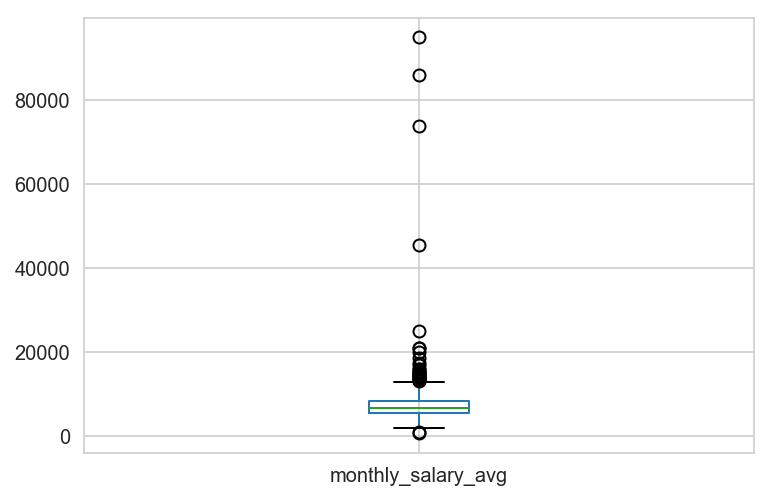

In [1419]:
#boxplot
Xtrain[['monthly_salary_avg']].boxplot()
#plt.xticks(rotation='vertical')

# lots of outliers

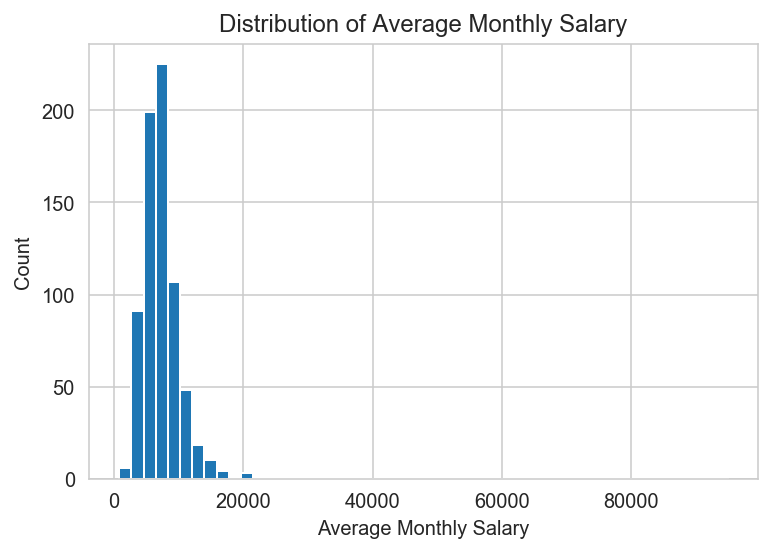

In [1420]:
plt.hist(Xtrain['monthly_salary_avg'],bins=50)
plt.title('Distribution of Average Monthly Salary'); plt.xlabel('Average Monthly Salary'); plt.ylabel('Count');
# seems skewed significantly by outliers

In [1421]:
X_train_mean = Xtrain['monthly_salary_avg'].mean()
X_train_std_dev = Xtrain['monthly_salary_avg'].std()

In [1422]:
Xtrain[np.abs(Xtrain['monthly_salary_avg']-X_train_mean) > (3*X_train_std_dev)]
# review the ones that are outside +3 to -3 standard deviations

,job_title,job_company,job_location,job_seniority,job_industry,job_employment_type,job_salary_range_from,job_salary_range_to,job_salary_type,job_details_url,job_description,job_requirements,monthly_salary_range_from,monthly_salary_range_to,monthly_salary_avg
604,Test Manager CRM,Company Undisclosed,South,Manager,Information Technology,Contract,6000.0,85000.0,Monthly,https://www.mycareersfuture.sg/job/test-manage...,"As a Test Manager, you will be expected to lea...",Bachelor’s degree in computer science/engineer...,6000.0,85000.0,45500.0
669,Business Intelligence Finance Senior Analyst ...,KERRY CONSULTING PTE. LTD.,Islandwide,Manager,Accounting / Auditing / Taxation,Permanent,70000.0,120000.0,Monthly,https://www.mycareersfuture.sg/job/business-in...,- Established Industry Leader - Newly Created...,The successful candidate should have a relevan...,70000.0,120000.0,95000.0
260,Data Scientist,EXIGER SINGAPORE PTE. LTD.,Central,Professional,Information Technology ...,Permanent,12000.0,160000.0,Monthly,https://www.mycareersfuture.sg/job/data-scient...,Position Summary We are looking for a resour...,Professional Experience Required A degree...,12000.0,160000.0,86000.0
727,Data Team Lead,MONEYSMART SINGAPORE PTE. LTD.,South,Manager,Information Technology,Permanent,8000.0,140000.0,Monthly,https://www.mycareersfuture.sg/job/data-team-l...,About the job Moneysmart is hiring a Data Te...,Requirements \t 6+ years of professional ex...,8000.0,140000.0,74000.0


In [1423]:
indices_to_be_dropped = Xtrain[np.abs(Xtrain['monthly_salary_avg']-X_train_mean) > (3*X_train_std_dev)].index

In [1424]:
# drop the outliers that are outside +3 to -3 standard deviations
print(df.shape)
df.drop(indices_to_be_dropped, inplace = True)
Xtrain_indices = [item for item in Xtrain_indices if item not in indices_to_be_dropped]
print(df.shape)

(956, 15)
(952, 15)


In [1426]:
Xtrain = df.loc[Xtrain_indices]

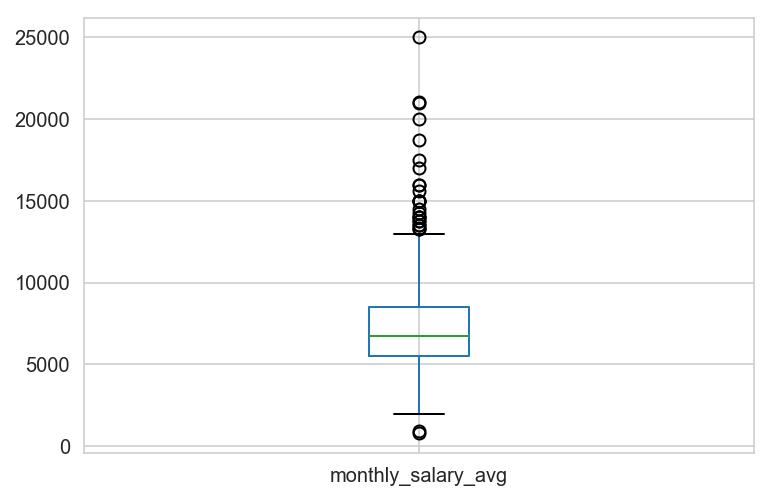

In [1427]:
#boxplot
Xtrain[['monthly_salary_avg']].boxplot()

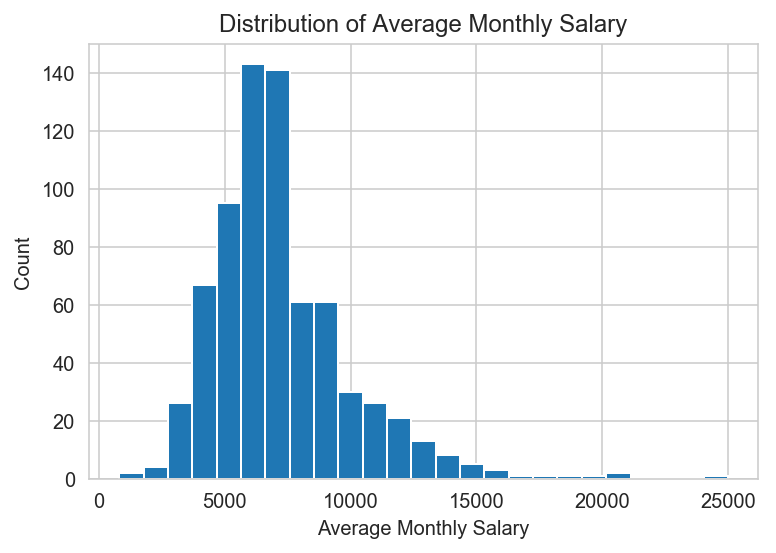

In [1428]:
plt.hist(Xtrain['monthly_salary_avg'],bins=25)
plt.title('Distribution of Average Monthly Salary'); plt.xlabel('Average Monthly Salary'); plt.ylabel('Count');

#### Add salary labels to indicate high or low based on median average monthly salary of Training Set

In [1430]:
# median salary of training set - add salary label to classify high or low
Xtrain['monthly_salary_avg'].median()

6750.0

In [1431]:
df['monthly_salary_class'] = df['monthly_salary_avg'].map(lambda x: 1 if x >= Xtrain['monthly_salary_avg'].median() else 0)

In [1433]:
#### Check baseline for Xtrain
Xtrain = df.loc[Xtrain_indices]
Xtrain['monthly_salary_class'].mean()

0.5231416549789621

In [ ]:
#### Perform NLP preprocessing

In [1448]:
Xtrain = df.loc[Xtrain_indices]
Xtest = df.loc[Xtest_indices]
print(Xtrain.shape)
print(Xtest.shape)
print(df.shape)
assert df.shape[0] == Xtrain.shape[0] + Xtest.shape[0]

(713, 16)
(239, 16)
(952, 16)


In [1479]:
# use CountVectorizer to create document-term matrices from X_train and X_test for job description
jd_cv = CountVectorizer(ngram_range=(1, 2),max_features=10000,stop_words='english',min_df=2)
Xtrain_cv_job_description = jd_cv.fit_transform(Xtrain['job_description'])
Xtest_cv_job_description = jd_cv.transform(Xtest['job_description'])

Xtrain_cv_job_description_df = pd.DataFrame(Xtrain_cv_job_description.todense(), columns=['jd_' + n for n in jd_cv.get_feature_names()])

In [1480]:
# use CountVectorizer to create document-term matrices from X_train and X_test for job requirements
jr_cv = CountVectorizer(ngram_range=(1, 2),max_features=10000,stop_words='english',min_df=2)
Xtrain_cv_job_requirements = jr_cv.fit_transform(Xtrain['job_requirements'])
Xtest_cv_job_requirements = jr_cv.transform(Xtest['job_requirements'])

Xtrain_cv_job_requirements_df = pd.DataFrame(Xtrain_cv_job_requirements.todense(), columns=['jr_' + n for n in jr_cv.get_feature_names()])

In [1518]:
jt_cv = CountVectorizer(ngram_range=(1, 2),max_features=10000,stop_words='english',min_df=2)
Xtrain_cv_job_title = jt_cv.fit_transform(Xtrain['job_title'])
Xtest_cv_job_title = jt_cv.transform(Xtest['job_title'])

Xtrain_cv_job_title_df = pd.DataFrame(Xtrain_cv_job_title.todense(), columns=['jt_' + n for n in jt_cv.get_feature_names()])



jt_12                         0
jt_12 month                   0
jt_180004im                   0
jt_20                         0
jt_20 i2r                     0
jt_2019                       0
jt_2019 time                  0
jt_610                        0
jt_administrator              0
jt_ai                         0
jt_algorithm                  0
jt_algorithm engineer         0
jt_analysis                   0
jt_analyst                    0
jt_analyst avp                0
jt_analyst bi                 0
jt_analyst business           0
jt_analyst cbg                0
jt_analyst data               0
jt_analyst digital            0
jt_analyst engineering        0
jt_analyst lead               0
jt_analyst manager            0
jt_analyst marketing          0
jt_analyst net                0
jt_analyst regulatory         0
jt_analyst risk               0
jt_analyst sap                0
jt_analyst scientist          0
jt_analyst singapore          0
                             ..
jt_time 

In [1482]:
# So .. we'll use np.sum() to convert it directly from the sparse matrix!
# This is enormously more memory-efficient ...
#   It only requires one int per column since summing across columns is the total word count.

def get_freq_words(sparse_counts, columns):
    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting
    word_counts = np.asarray(sparse_counts.sum(axis=0)).reshape(-1)

    # argsort() returns smallest first, so we reverse the result
    largest_count_indices = word_counts.argsort()[::-1]

    # pretty-print the results! Remember to always ask whether they make sense ...
    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index=columns[largest_count_indices])

    return freq_words


freq_words = get_freq_words(Xtrain_cv_job_requirements, np.array(jr_cv.get_feature_names()))
freq_words[:20]

experience       2232
data             1270
skills            948
business          669
knowledge         603
strong            593
years             557
ability           497
good              455
management        453
work              433
degree            410
working           394
communication     382
science           374
computer          351
development       333
team              324
learning          318
requirements      306
dtype: int64

In [1483]:
freq_words = get_freq_words(Xtrain_cv_job_description, np.array(jd_cv.get_feature_names()))
freq_words[:20]

data            2293
business        1506
team             743
work             652
solutions        589
management       564
design           560
development      507
support          507
requirements     486
project          472
learning         465
develop          452
analysis         380
teams            377
technical        370
research         366
experience       361
analytics        352
new              350
dtype: int64

In [1484]:
freq_words = get_freq_words(Xtrain_cv_job_title, np.array(jt_cv.get_feature_names()))
freq_words[:20]

analyst             238
data                224
business            199
business analyst    150
engineer            150
senior              129
scientist            80
manager              69
data scientist       53
data engineer        44
research             43
developer            42
consultant           35
data analyst         35
analytics            33
lead                 31
big                  31
associate            30
big data             30
senior business      27
dtype: int64

In [1510]:
df_train_job_industry = pd.get_dummies(df['job_industry'], prefix='ji', prefix_sep='_', dummy_na=False, sparse=False, drop_first=True, dtype=None)
Xtrain_job_industry = df_train_job_industry.loc[Xtrain_indices]

In [1519]:
x = df['job_seniority'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
df_job_seniority = pd.get_dummies(x, prefix='js', columns=['job_seniority']).groupby(level=0).sum()
Xtrain_job_seniority = df_job_seniority.loc[Xtrain_indices]

js_Executive            0
js_Freshentry level     0
js_Junior Executive     0
js_Manager              0
js_Middle Management    0
js_Nonexecutive         0
js_Professional         0
js_Senior Executive     0
js_Senior Management    0
dtype: int64

In [1524]:
# concatenate all the features together

Xtrain_all = pd.concat([Xtrain_cv_job_title_df.reindex(),Xtrain_cv_job_description_df.reindex(),Xtrain_cv_job_requirements_df.reindex(),Xtrain_job_industry.reindex(),Xtrain_job_seniority.reindex()],axis=1)

<a id='qn1'/>
### Qn 1 - Train and Test

In [1516]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

rf = RandomForestClassifier(n_estimators=250, verbose=1)
knn = KNeighborsClassifier(n_neighbors=7)

rf.fit(Xtrain_all, ytrain)
knn.fit(Xtrain_all, ytrain)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [1525]:
Xtrain_all.isnull().sum()

# last checkpoint : having problem with null values

jt_12                                   301
jt_12 month                             301
jt_180004im                             301
jt_20                                   301
jt_20 i2r                               301
jt_2019                                 301
jt_2019 time                            301
jt_610                                  301
jt_administrator                        301
jt_ai                                   301
jt_algorithm                            301
jt_algorithm engineer                   301
jt_analysis                             301
jt_analyst                              301
jt_analyst avp                          301
jt_analyst bi                           301
jt_analyst business                     301
jt_analyst cbg                          301
jt_analyst data                         301
jt_analyst digital                      301
jt_analyst engineering                  301
jt_analyst lead                         301
jt_analyst manager              

In [ ]:
# Random forest score:
print('RF:', rf.score(X_test, y_test))
print('KNN:', knn.score(X_test, y_test))